 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [13]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [14]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [22]:
# Count nulls
whale_returns.isnull.sum()

AttributeError: 'function' object has no attribute 'sum'

In [18]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [19]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [20]:
# Count nulls
algo_returns.isnull.sum()

AttributeError: 'function' object has no attribute 'sum'

In [21]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [23]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True)
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [27]:
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')
sp500_history.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [28]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [29]:
# Fix Data Types
sp500_history['Close'] =sp500_history['Close'].astype('float')
sp500_history.dtypes

Close    float64
dtype: object

In [30]:
# Calculate Daily Returns
sp500_history['Close'] = sp500_history['Close'].pct_change()
sp500_history.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [31]:
# Drop nulls
sp500_history.isnull().sum()

Close    1
dtype: int64

In [32]:
sp500_history.dropna(inplace=True)
sp500_history.isnull().sum()

Close    0
dtype: int64

In [33]:
# Rename Column
sp500_history = sp500_history.rename(columns={"Close": "S & P 500"})
sp500_history.head()

,S & P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [34]:
combined_returns = pd.concat([whale_returns, algo_returns, sp500_history], axis="columns", join="inner")
combined_returns.sort_index(inplace=True)
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S & P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

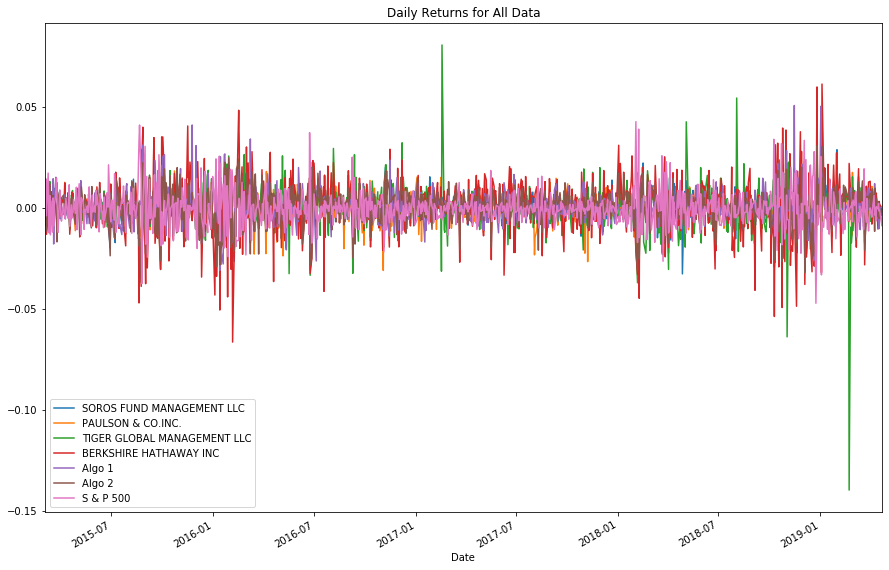

In [35]:
# Plot daily returns
combined_returns.plot(figsize=(15,10), title=('Daily Returns for All Data'))

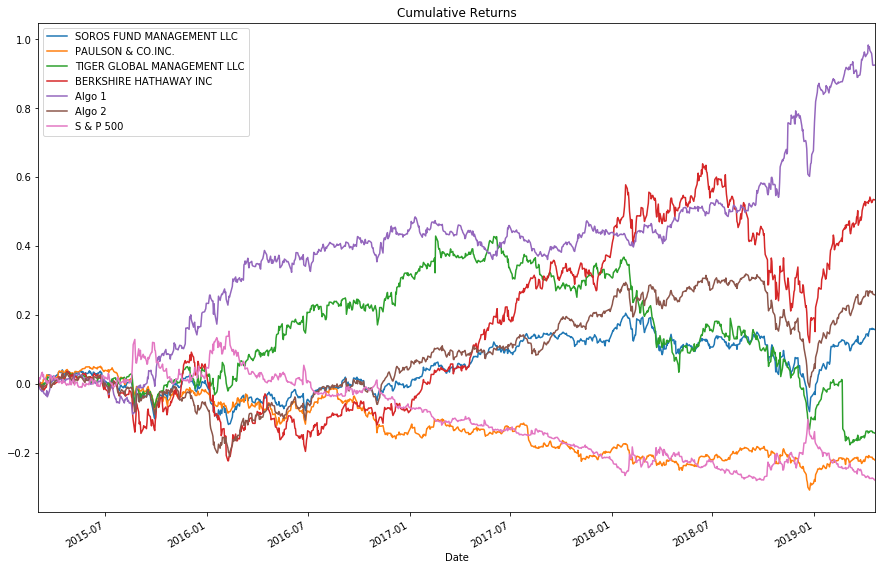

In [36]:
# Plot cumulative returns
cumlative_returns = (1 + combined_returns).cumprod() -1
cumlative_returns.plot(figsize=(15,10), title='Cumulative Returns')

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

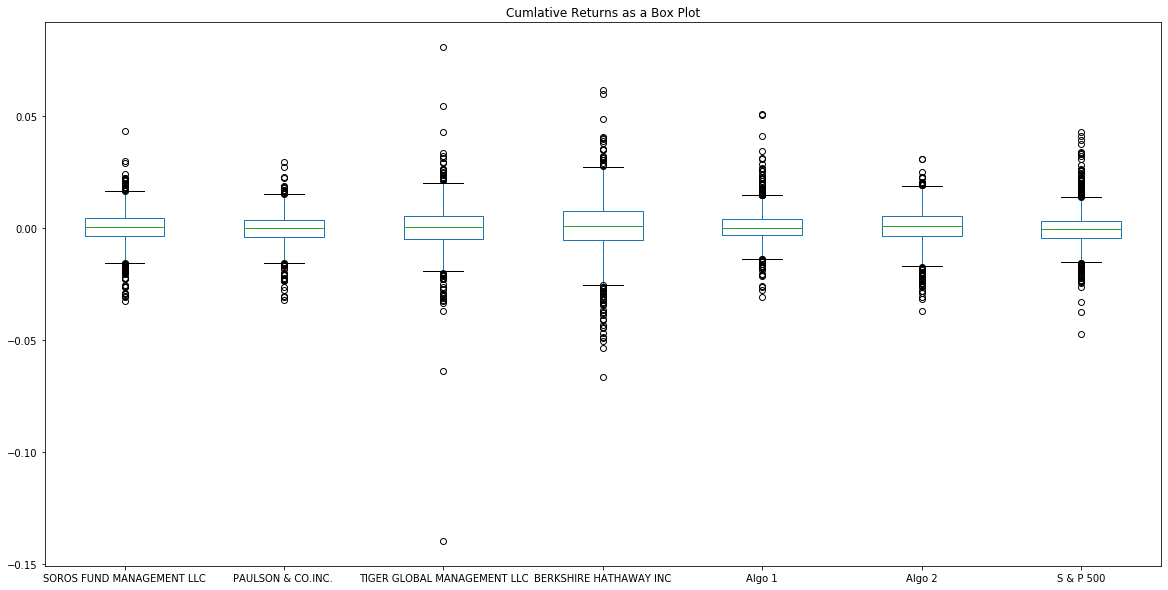

In [37]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(20,10), title='Cumlative Returns as a Box Plot')

In [39]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
daily_std = combined_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S & P 500                      0.008587
dtype: float64

In [23]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [40]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S & P 500                      0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

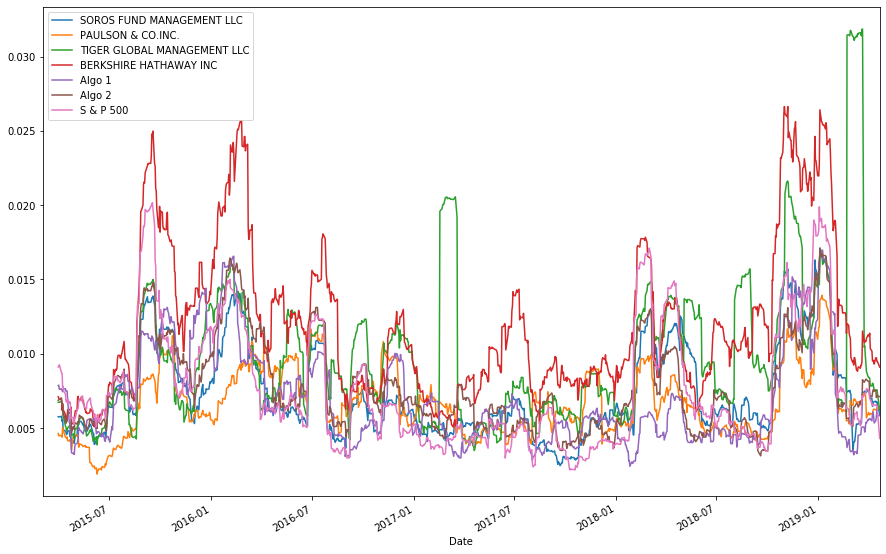

In [41]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
combined_returns.rolling(window=21).std().plot(figsize=(15,10))

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S & P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S & P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


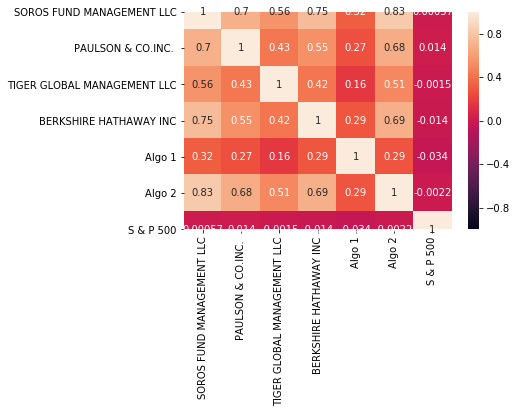

In [42]:
# Correlation
import seaborn as sns
correlation = combined_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
correlation

In [47]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance = combined_returns['TIGER GLOBAL MANAGEMENT LLC'].cov(combined_returns['S & P 500'])
variance = combined_returns['S & P 500'].var()
beta = covariance / variance
beta

-0.0019097027512372758

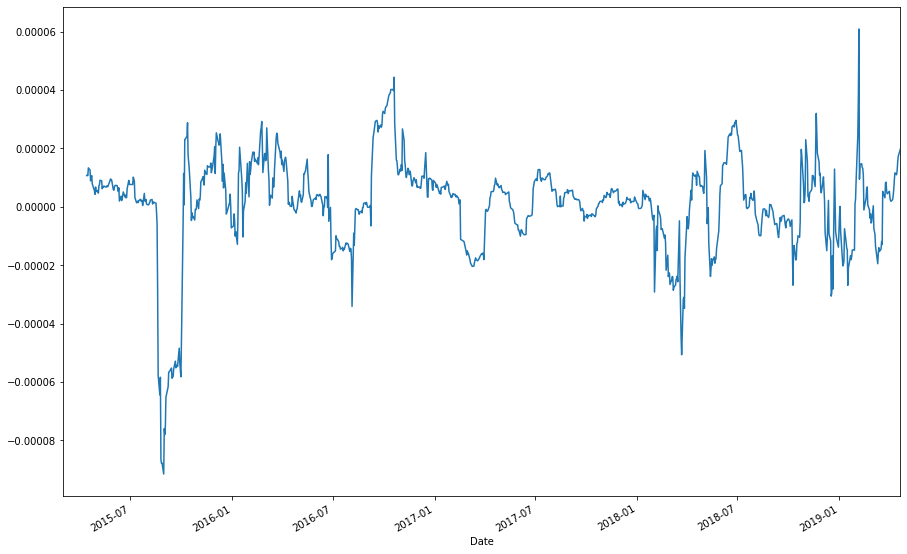

In [48]:
rolling_covariance = combined_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=30).cov(combined_returns['S & P 500'])
rolling_covariance.plot(figsize=(15, 10))

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

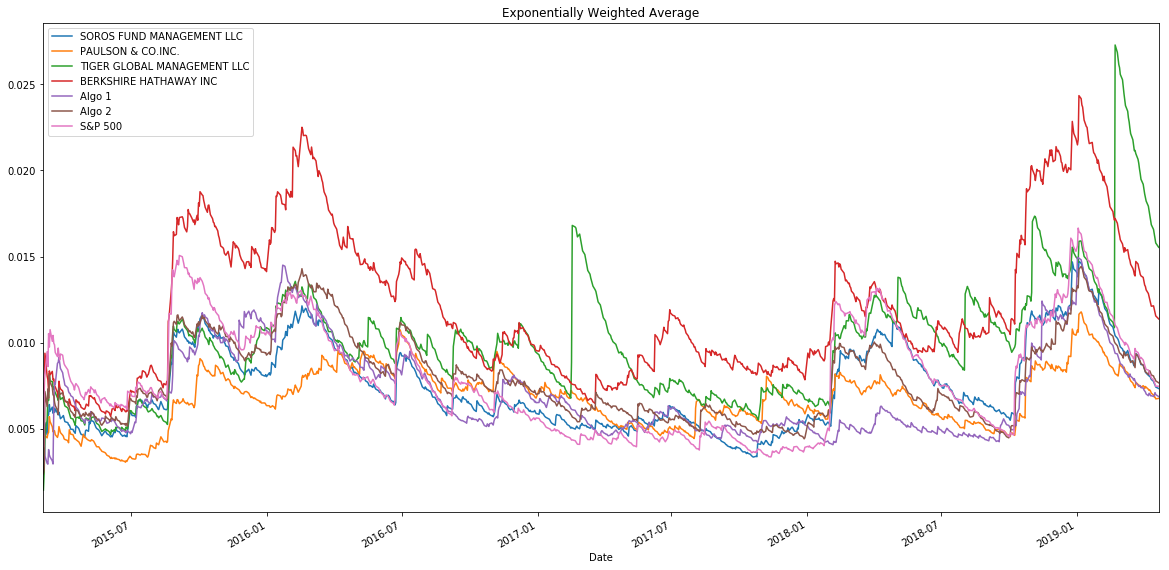

In [28]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [49]:
# Annualzied Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S & P 500                     -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

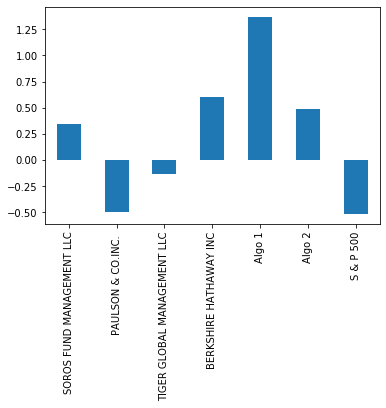

In [50]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [60]:
# Read the first stock
goog_csv = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_csv, index_col="Trade DATE", parse_dates=True)
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [61]:
# Read the second stock
aapl_csv = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_csv, index_col="Trade DATE", parse_dates=True)
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [63]:
# Read the third stock
cost_csv = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_csv, index_col="Trade DATE", parse_dates=True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [70]:
# Concatenate all stocks into a single DataFrame
combined_df = pd.concat([aapl_df, goog_df, cost_df], axis="columns", join="inner")
combined_df.sort_index(inplace=True)
combined_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,GOOG,1098.26,COST,195.76
2018-05-14,AAPL,188.15,GOOG,1100.20,COST,195.88
2018-05-15,AAPL,186.44,GOOG,1079.23,COST,195.48
2018-05-16,AAPL,188.18,GOOG,1081.77,COST,198.71
2018-05-17,AAPL,186.99,GOOG,1078.59,COST,199.60


In [73]:
# Reset the index
combined_df = pd.concat([aapl_df, goog_df, cost_df], axis="rows", join="inner")
combined_df = combined_df.reset_index()

In [74]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
combined_df = combined_df.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
combined_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [75]:
# Drop Nulls
combined_df.isnull.sum()

AttributeError: 'function' object has no attribute 'sum'

In [77]:
combined_df.dropna(inplace=True)
combined_df.isnull().sum()

Symbol
AAPL    0
COST    0
GOOG    0
dtype: int64

In [80]:
#Calculate Daily Returns

In [81]:
daily_returns = combined_df.pct_change()
daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [82]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

Trade DATE
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [83]:
new_combined_df = pd.concat([combined_returns, portfolio_returns], axis="columns", join="inner")
new_combined_df.columns = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'S & P 500', 'My Portfolio']
new_combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S & P 500,My Portfolio
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,NaN
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595


In [40]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [84]:
# Risk
new_daily_std = new_combined_df.std()
new_daily_std

SOROS FUND MANAGEMENT LLC      0.009234
PAULSON & CO.INC.              0.007350
TIGER GLOBAL MANAGEMENT LLC    0.014642
BERKSHIRE HATHAWAY INC         0.015548
Algo 1                         0.008419
Algo 2                         0.008769
S & P 500                      0.009584
My Portfolio                   0.013331
dtype: float64

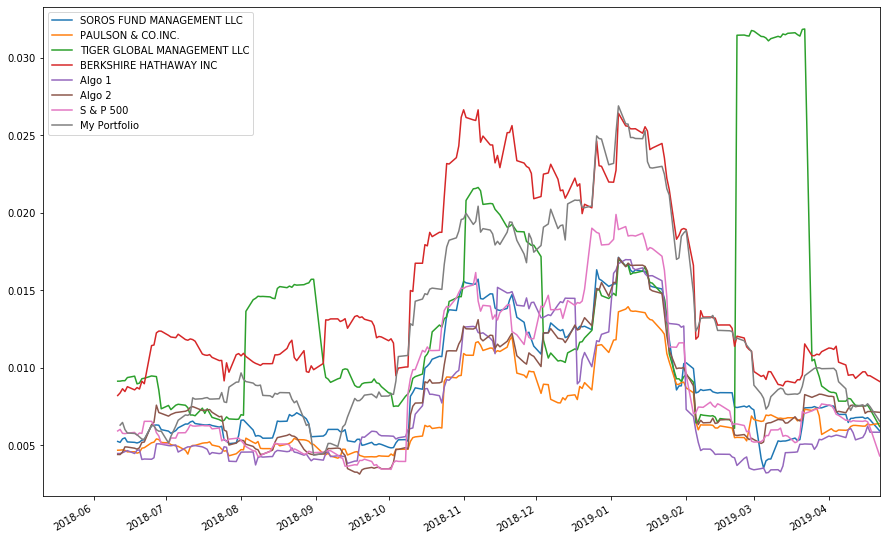

In [85]:
# Rolling
new_combined_df.rolling(window=21).std().plot(figsize=(15,10))

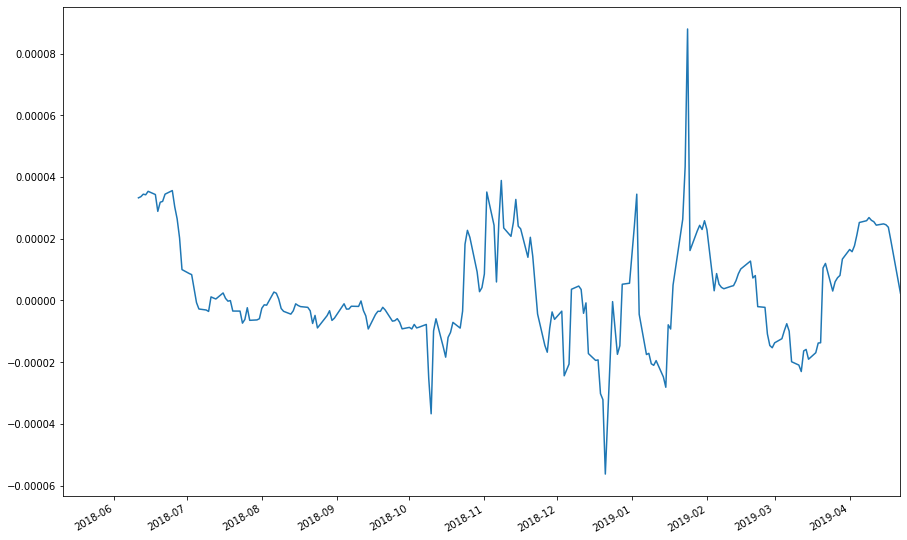

In [94]:
# Beta
rolling_covariance = new_combined_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).cov(new_combined_df['S & P 500'])
rolling_covariance.plot(figsize=(15, 10))

In [96]:
# Annualzied Sharpe Ratios
sharpe_ratios = (new_combined_df.mean() * 252) / (new_combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
Algo 1                         1.999866
Algo 2                         0.009467
S & P 500                     -0.432942
My Portfolio                   0.876152
dtype: float64

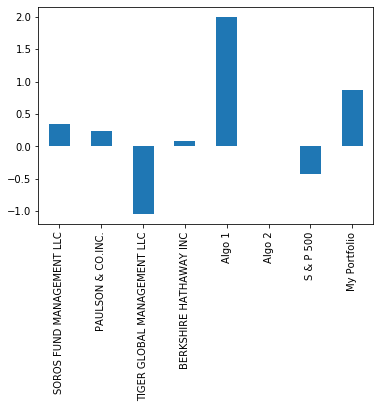

In [99]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

## Include correlation analysis to determine which stocks (if any) are correlated

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S & P 500,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.791031,0.476938,0.816190,0.336890,0.861989,-0.028091,0.732548
PAULSON & CO.INC.,0.791031,1.000000,0.484917,0.650132,0.360668,0.783856,-0.059893,0.643828
TIGER GLOBAL MANAGEMENT LLC,0.476938,0.484917,1.000000,0.323931,0.113568,0.408381,0.005812,0.390961
BERKSHIRE HATHAWAY INC,0.816190,0.650132,0.323931,1.000000,0.326025,0.781894,-0.038751,0.800558
Algo 1,0.336890,0.360668,0.113568,0.326025,1.000000,0.364440,-0.054454,0.260331
Algo 2,0.861989,0.783856,0.408381,0.781894,0.364440,1.000000,-0.042549,0.739020
S & P 500,-0.028091,-0.059893,0.005812,-0.038751,-0.054454,-0.042549,1.000000,0.005603
My Portfolio,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603,1.000000


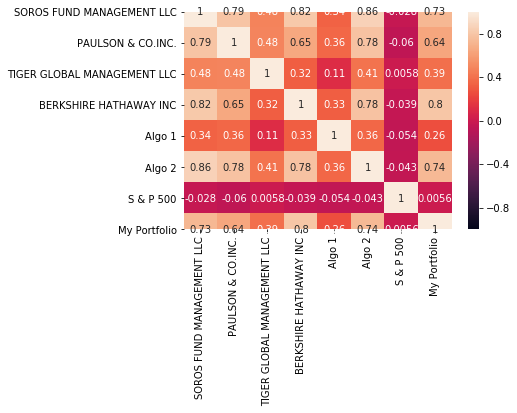

In [102]:
import seaborn as sns
correlation = new_combined_df.corr()
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
correlation